1)1. Apply Linear Regression to the provided dataset using underlying steps.
a. Import the given “Salary_Data.csv”
b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
c. Train and predict the model.
d. Calculate the mean_squared error
e. Visualize both train and test data using scatter plot.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0 head
Y predicted 
: [ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]
Mean Squared Error:  21026037.329511296
root mean squared error:  4585.4157204675885
mse using numpy 21026037.329511296


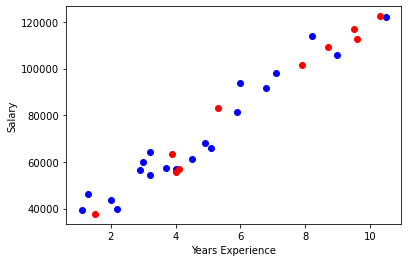

In [4]:
import numpy as np
import pandas as pd 
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

salary_data = pd.read_csv("Salary_Data.csv")
print(salary_data.head(),'head')

X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:, -1].values

#split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.333, random_state = 0)

# Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Predicting the Test set result ￼
Y_Pred = regressor.predict(X_test)
print("Y predicted \n:",Y_Pred)

# Mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test , Y_Pred)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("root mean squared error: ", rmse)

#MSE using numpy
MSE = np.square(np.subtract(Y_test,Y_Pred)).mean()
print('mse using numpy', MSE)

# scatter plot for training salary data
plt.scatter(X_train,Y_train , color = "blue")
plt.xlabel('Years Experience')
plt.ylabel('Salary')
# plt.show()

#  plotting for testing data
plt.scatter(X_test,Y_test , color = "red")
plt.show()



2. Apply K means clustering in the dataset provided:
• Remove any null values by the mean.
• Use the elbow method to find a good number of clusters with the K-Means algorithm
• Calculate the silhouette score for the above clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

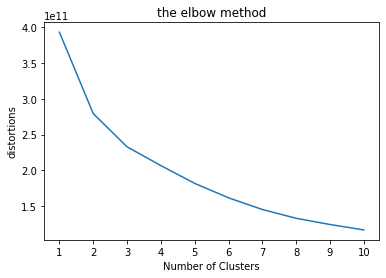

0.39813827225952697
x scaled:  [[-0.73198937 -0.24943448 -0.42489974 ... -0.31096755 -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.08931021  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.10166318 -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.33546549  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.34690648  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.33294642 -0.52555097
  -4.12276757]]
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8945 -0.737950  

In [2]:
import numpy as np
import pandas as pd 
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

customer_data = pd.read_csv("K-Mean_Dataset.csv")
# print(customer_data.head(),'head')

print(customer_data.info(),'checking info')
#replacing null values to the sum of n values
nValues = customer_data.isnull().sum()
print("Null values: ", nValues)
# so now the null values are present in "CREDIT_LIMIT" , "MINIMUM_PAYMENTS" columns
customer_data["CREDIT_LIMIT"].fillna(customer_data["CREDIT_LIMIT"].mean(),inplace=True)
customer_data["MINIMUM_PAYMENTS"].fillna(customer_data["MINIMUM_PAYMENTS"].mean(),inplace=True)

nValues = customer_data.isnull().sum()
print("Null values of nval: ", nValues)

# customer_data.drop("CUST_ID",axis=1,inplace=True)

X_customer = customer_data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
Y_customer = customer_data.iloc[:, -1]
# ##elbow method
from sklearn.cluster import KMeans

distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_customer)
    distortions.append(kmeans.inertia_)

plt.plot(range(1,11),distortions)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('distortions')
plt.show()

# from the elbow method the good number of clusters will be 2
km = KMeans(n_clusters=4)
km.fit(X_customer)
y_cluster_kmeans = km.predict(X_customer)
from sklearn import metrics
score = metrics.silhouette_score(X_customer, y_cluster_kmeans)
print(score)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X_customer)
X_scaled_array = scaler.transform(X_customer)
X_scaled = pd.DataFrame(X_scaled_array, columns = X_customer.columns)
print("x scaled: ", X_scaled_array)
print(X_scaled , 'dataset')

km.fit(X_scaled_array)
y_cluster_k = km.predict(X_scaled_array)
from sklearn import metrics
sco = metrics.silhouette_score(X_scaled_array, y_cluster_k)
print(sco)

